## Question 2
## Census Income Data Set - Machine Learning Model
#### Data Source: https://www.kaggle.com/uciml/adult-census-income
### Attribute Characteristics: Categorical, Integer
### Data Set Characteristics:  Multivariate
## Prediction task is to determine whether a person makes over 50K a year.

1. Import the csv dataset from https://www.kaggle.com/uciml/adult-census-income (Links to an external site.) .

2. Identify the presence of missing values, fill the missing values with mean for numerical attributes and mode value for categorical attributes.

3. Extract X as all columns except the Income column and Y as Income column.

4. Split the data into training set and testing set.

5. Model the classifier using GaussianNB, BernoulliNB and MultinomialNB

6. Compute the accuracy and confusion matrix for each models.

7. Plot the decision boundary, visualize training and test results of all the models

8. Create an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

#### Data Understanding:
- age: Continuous

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Objective : To predict whether a given adult makes more than 50,000 a year based attributes such as: 
#### age, workclass, fnlwgt, education, education.num, marital.status, occupation, relationship, race, sex, capital.gain, capital.loss, hours.per.week, native.country, income.

### Common Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from scipy.stats import pointbiserialr, spearmanr
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
cwd = os.getcwd()

### 1. Import the csv dataset from https://www.kaggle.com/uciml/adult-census-income

In [2]:
ds=pd.read_csv('adult.csv',na_values='?')
print(ds.columns,'\n')
print(str.format('Number of Columns/Features: {0}',len(ds.columns)))

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object') 

Number of Columns/Features: 15


- Get the the Data set using read_csv and replace '?' with NaN
- Understand the number of columns

In [3]:
ds.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Understanding Number of Null values and outliers

In [4]:
col_names=ds.columns
beforeDropTupleCount= len(ds)
len(ds.columns)
print(ds.info())
ds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

#### From above informaion null check, understood that 3 feature have null values
- workclass - string - 1836 null records
- occupation - string - 1843 null records
- native.country - string - 583 null records

## 2. Identify the presence of missing values, fill the missing values with mean for numerical attributes and mode value for categorical attributes. 

In [5]:
print('workclass mode:',ds['workclass'].mode().iloc[0])
print('occupation mode:',ds['occupation'].mode().iloc[0])
print('native.country mode:',ds['native.country'].mode().iloc[0])
ds['workclass']=ds['workclass'].fillna(ds['workclass'].mode().iloc[0])
ds['occupation']=ds['occupation'].fillna(ds['occupation'].mode().iloc[0])
ds['native.country']=ds['native.country'].fillna(ds['native.country'].mode().iloc[0])

workclass mode: Private
occupation mode: Prof-specialty
native.country mode: United-States


In [6]:
col_names=['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income',]
col_names=ds.columns
beforeDropTupleCount= len(ds)
len(ds.columns)
print(ds.info())
ds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
ds.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 2.1 Below Null records are handled in above step
- workclass mode: Private
- occupation mode: Prof-specialty
- native.country mode: United-States

### 2.1.1 Data analysis
- Distinct Value on each Feature/Attributes

In [8]:
print(ds.info())
Attribute_Wise_Count = pd.DataFrame(columns=['Attribute', 'Distinct_Count'])
for col_index in ds.columns:
    Attribute_Wise_Count = Attribute_Wise_Count.append(pd.DataFrame({'Attribute': [col_index],'Distinct_Count': [len(ds[col_index].unique())]}))
Attribute_Wise_Count.reset_index(drop=True).sort_values(by='Distinct_Count', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,Attribute,Distinct_Count
2,fnlwgt,21648
10,capital.gain,119
12,hours.per.week,94
11,capital.loss,92
0,age,73
13,native.country,41
3,education,16
4,education.num,16
6,occupation,14
1,workclass,8


### 2.1.2 Numerical data visual interpretation

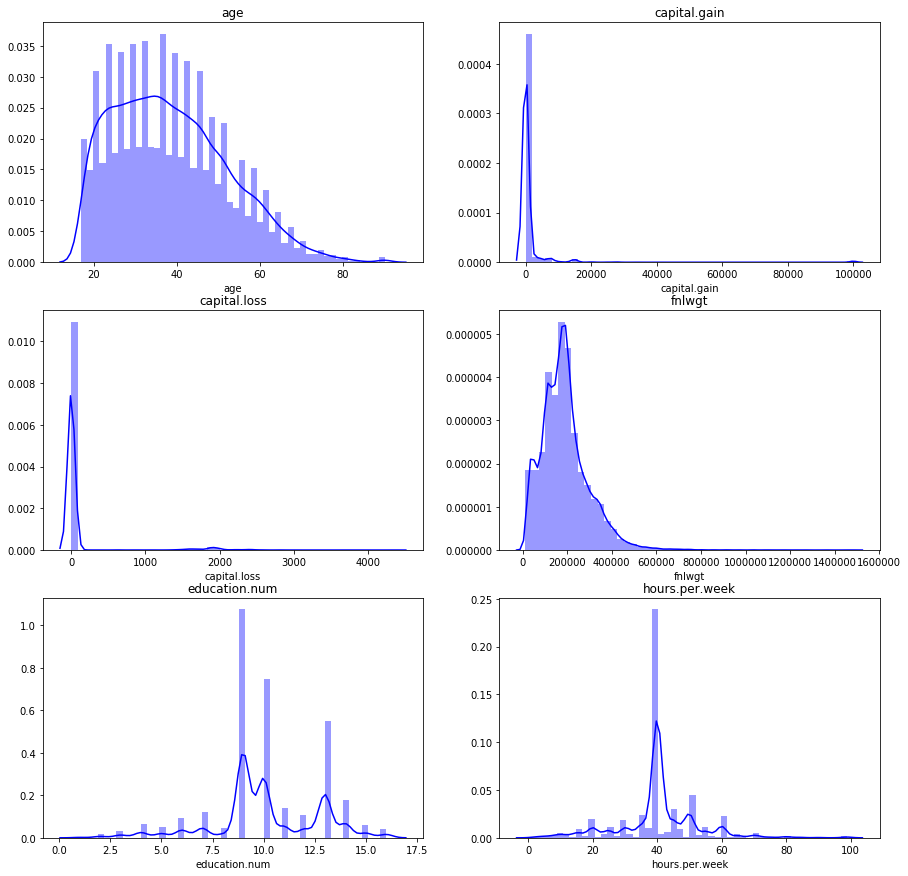

In [9]:
num_col=['age','capital.gain','capital.loss','fnlwgt','education.num','hours.per.week']
fig,axes = plt.subplots(3,2,figsize=(15,15))
for idx,cat_col in enumerate(num_col):
    row,col = idx//2,idx%2
    sns.distplot(ds[cat_col],ax=axes[row,col], rug=False, color='b', label="All").set_title(cat_col)
plt.subplots_adjust(hspace=.2)

### 2.1.3 Correclation on numerical values

In [10]:
X = ds[col_names]
X.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


## 2.2 Categorical Visual Interpretation

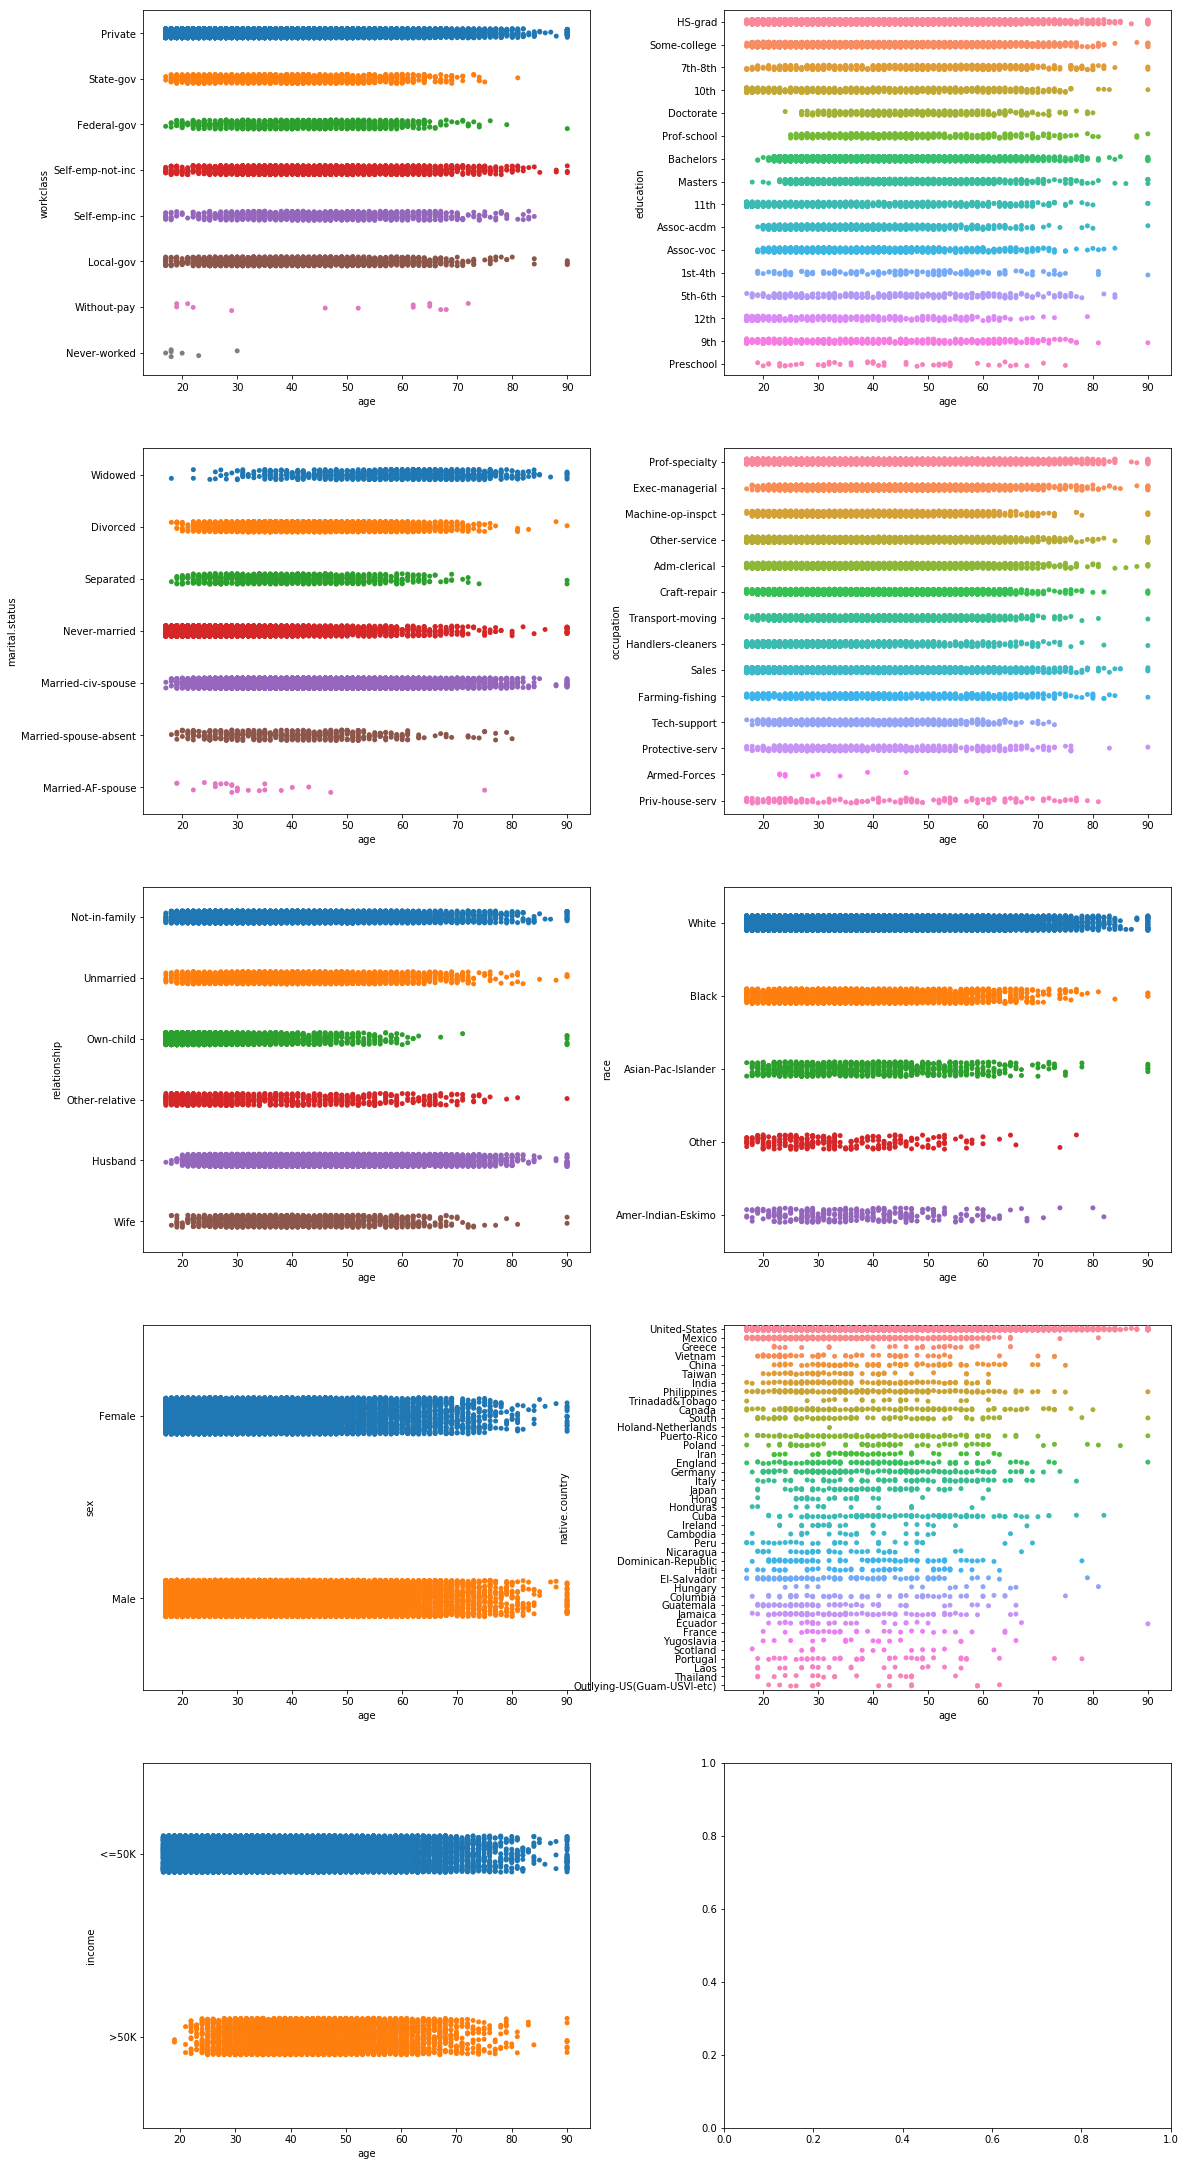

In [11]:
filtered = [(item) for item in ds.columns.tolist() if item not in num_col]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
fig.tight_layout()
for idx,cat_col in enumerate(filtered):
    row,col = idx//2,idx%2
    g=sns.catplot(x='age', y=cat_col, data=ds, ax=axes[row,col])
    plt.title('cat_col')
    plt.close()    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
plt.show()

### 2.2.1 Exploring categorical data individually with respect to age

In [12]:
def plot_chart(x_axis_val,y_axis_val):
    heights = y_axis_val
    bars = x_axis_val
    y_pos = range(len(bars))
    plt.bar(y_pos, heights)
    plt.xticks(y_pos, bars, rotation=90)

,education.num,education,count
0,9,HS-grad,10501
1,10,Some-college,7291
2,13,Bachelors,5355
3,14,Masters,1723
4,11,Assoc-voc,1382
5,7,11th,1175
6,12,Assoc-acdm,1067
7,6,10th,933
8,4,7th-8th,646
9,15,Prof-school,576


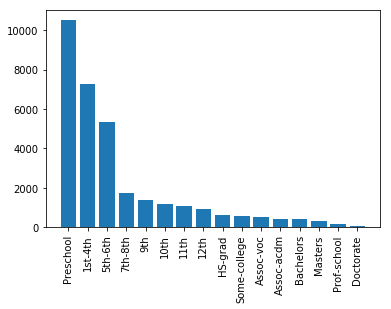

In [13]:
education_df=pd.DataFrame(ds.groupby(['education.num', 'education'])['age'].count())
education_df=education_df.sort_values(by=['age'],ascending=False)
plot_chart(ds.sort_values(by=['education.num'])['education'].unique(),education_df['age'])
pd.DataFrame(education_df).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)

,workclass,count
3,Private,24532
5,Self-emp-not-inc,2541
1,Local-gov,2093
6,State-gov,1298
4,Self-emp-inc,1116
0,Federal-gov,960
7,Without-pay,14
2,Never-worked,7


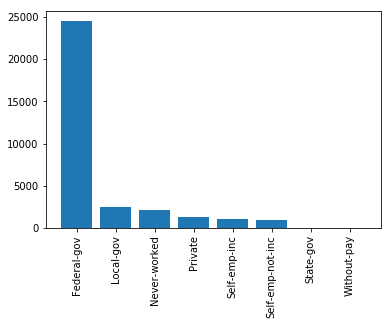

In [14]:
type_employer_df=pd.DataFrame(ds.groupby(['workclass'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['workclass'])['workclass'].unique(),type_employer_df['count'])
type_employer_df

,occupation,count
9,Prof-specialty,5983
2,Craft-repair,4099
3,Exec-managerial,4066
0,Adm-clerical,3770
11,Sales,3650
7,Other-service,3295
6,Machine-op-inspct,2002
13,Transport-moving,1597
5,Handlers-cleaners,1370
4,Farming-fishing,994


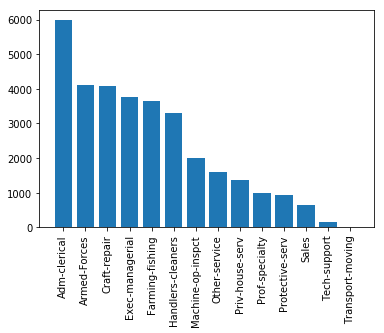

In [15]:
occupation_df=pd.DataFrame(ds.groupby(['occupation'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['occupation'])['occupation'].unique(),occupation_df['count'])
occupation_df

,race,count
4,White,27816
2,Black,3124
1,Asian-Pac-Islander,1039
0,Amer-Indian-Eskimo,311
3,Other,271


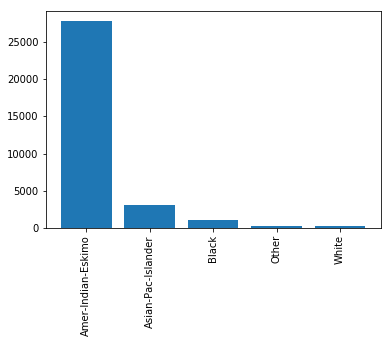

In [16]:
race_df=pd.DataFrame(ds.groupby(['race'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['race'])['race'].unique(),race_df['count'])
race_df

,sex,count
1,Male,21790
0,Female,10771


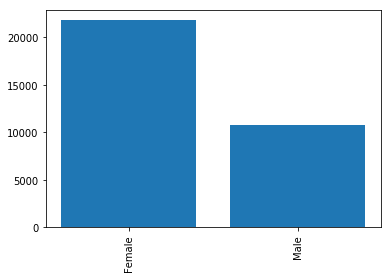

In [17]:
sex_df=pd.DataFrame(ds.groupby(['sex'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['sex'])['sex'].unique(),sex_df['count'])
sex_df

,relationship,count
0,Husband,13193
1,Not-in-family,8305
3,Own-child,5068
4,Unmarried,3446
5,Wife,1568
2,Other-relative,981


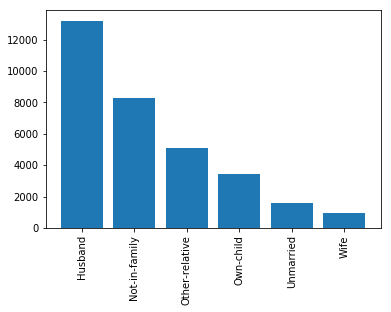

In [18]:
relation_df=pd.DataFrame(ds.groupby(['relationship'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['relationship'])['relationship'].unique(),relation_df['count'])
relation_df

,marital.status,count
2,Married-civ-spouse,14976
4,Never-married,10683
0,Divorced,4443
5,Separated,1025
6,Widowed,993
3,Married-spouse-absent,418
1,Married-AF-spouse,23


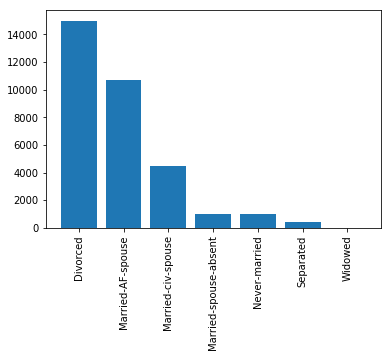

In [19]:
marital_df=pd.DataFrame(ds.groupby(['marital.status'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['marital.status'])['marital.status'].unique(),marital_df['count'])
marital_df

,native.country,count
38,United-States,29753
25,Mexico,643
29,Philippines,198
10,Germany,137
1,Canada,121
32,Puerto-Rico,114
7,El-Salvador,106
18,India,100
4,Cuba,95
8,England,90


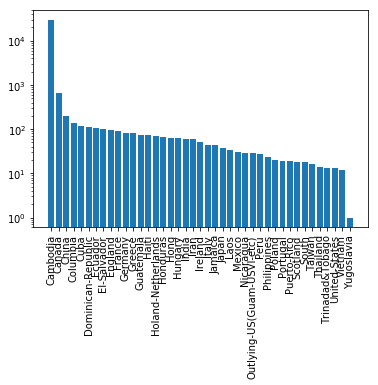

In [20]:
country_df=pd.DataFrame(ds.groupby(['native.country'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['native.country'])['native.country'].unique(),country_df['count'])
plt.yscale('log')
country_df

,income,count
0,<=50K,24720
1,>50K,7841


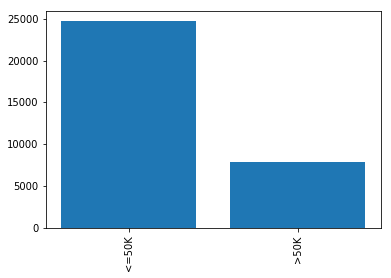

In [21]:
income_df=pd.DataFrame(ds.groupby(['income'])['age'].count()).reset_index().rename({'age': 'count'}, axis=1).sort_values(by=['count'],ascending=False)
plot_chart(ds.sort_values(by=['income'])['income'].unique(),income_df['count'])
income_df

### There are two types in target class: one is “50K” and the other is’ < = 50K ‘. Below is the understanding
- The data is distribution with tags is unbalanced, and the proportion of ‘< = 50K’ tags is greater, which is 75%.
- Understood that the imbalance of label data distribution.
- It will be a binary task.

## 2.3 Encoding Categorical Values

In [22]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
max_val=0
rows=[]
for idx,col_val in enumerate(filtered):
    unq_cnt=ds[col_val].nunique()
    rows.append([col_val,unq_cnt])
    if max_val < unq_cnt:
        max_val=unq_cnt
df_temp = pd.DataFrame(rows, columns=["Feature", "Encoded Value"])
u=[i for i in range(max_val)]
encode_trans_inv=pd.DataFrame(data={"Encoded Value":np.array(u)})
ds_enc=ds.copy()
for idx,col_val in enumerate((df_temp.sort_values(by="Encoded Value",ascending=False))['Feature']):
    ds_enc[col_val]=label_encoder.fit_transform(ds_enc[col_val])
    label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))    
    encode_trans_inv[col_val]=pd.Series(np.array(list(label_encoder_name_mapping.keys())))
print('Encoded Ouput table interpretation')
encode_trans_inv

Encoded Ouput table interpretation


,Encoded Value,native.country,education,occupation,workclass,marital.status,relationship,race,sex,income
0,0,Cambodia,10th,Adm-clerical,Federal-gov,Divorced,Husband,Amer-Indian-Eskimo,Female,<=50K
1,1,Canada,11th,Armed-Forces,Local-gov,Married-AF-spouse,Not-in-family,Asian-Pac-Islander,Male,>50K
2,2,China,12th,Craft-repair,Never-worked,Married-civ-spouse,Other-relative,Black,NaN,NaN
3,3,Columbia,1st-4th,Exec-managerial,Private,Married-spouse-absent,Own-child,Other,NaN,NaN
4,4,Cuba,5th-6th,Farming-fishing,Self-emp-inc,Never-married,Unmarried,White,NaN,NaN
5,5,Dominican-Republic,7th-8th,Handlers-cleaners,Self-emp-not-inc,Separated,Wife,NaN,NaN,NaN
6,6,Ecuador,9th,Machine-op-inspct,State-gov,Widowed,NaN,NaN,NaN,NaN
7,7,El-Salvador,Assoc-acdm,Other-service,Without-pay,NaN,NaN,NaN,NaN,NaN
8,8,England,Assoc-voc,Priv-house-serv,NaN,NaN,NaN,NaN,NaN,NaN
9,9,France,Bachelors,Prof-specialty,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ds_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int32
fnlwgt            32561 non-null int64
education         32561 non-null int32
education.num     32561 non-null int64
marital.status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null int32
income            32561 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


### 2.3.1 Percentage of Income Data

In [24]:
from collections import Counter
target = ds.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=24720, Percentage=75.919%
Class=>50K, Count=7841, Percentage=24.081%


In [25]:
ds_enc.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


### 2.4 Entire dataset corelation after encoding

In [26]:
corr =ds_enc.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1,0.041,-0.077,-0.011,0.037,-0.27,0.0017,-0.26,0.029,0.089,0.078,0.058,0.069,-0.00027,0.23
workclass,0.041,1,-0.024,0.0049,0.0035,-0.02,0.0071,-0.058,0.048,0.072,0.032,0.0026,0.042,-0.0016,0.0027
fnlwgt,-0.077,-0.024,1,-0.028,-0.043,0.028,0.00019,0.0089,-0.021,0.027,0.00043,-0.01,-0.019,-0.063,-0.0095
education,-0.011,0.0049,-0.028,1,0.36,-0.038,-0.041,-0.011,0.014,-0.027,0.03,0.017,0.056,0.076,0.079
education.num,0.037,0.0035,-0.043,0.36,1,-0.069,0.071,-0.094,0.032,0.012,0.12,0.08,0.15,0.089,0.34
marital.status,-0.27,-0.02,0.028,-0.038,-0.069,1,0.035,0.19,-0.068,-0.13,-0.043,-0.034,-0.19,-0.021,-0.2
occupation,0.0017,0.0071,0.00019,-0.041,0.071,0.035,1,-0.037,-0.0048,0.047,0.018,0.0097,-0.013,-0.0022,0.035
relationship,-0.26,-0.058,0.0089,-0.011,-0.094,0.19,-0.037,1,-0.12,-0.58,-0.058,-0.061,-0.25,-0.011,-0.25
race,0.029,0.048,-0.021,0.014,0.032,-0.068,-0.0048,-0.12,1,0.087,0.011,0.019,0.042,0.12,0.072
sex,0.089,0.072,0.027,-0.027,0.012,-0.13,0.047,-0.58,0.087,1,0.048,0.046,0.23,0.0021,0.22


#### Highly Correlated Values
- education-income:        0.34
- age-income:              0.24
- hours.per.week-income:   0.23
- sex-hours.per.week:      0.23
- sex-income:              0.22
- age-hours.per.week:      0.1

## 3. Extract X as all columns except the Income column and Y as Income column.

In [27]:
X = ds.iloc[:,:14]
Y = ds.iloc[:,-1:]
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [28]:
Y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [29]:
X = ds_enc.iloc[:,:14]
Y = ds_enc.iloc[:,-1:]
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38


In [30]:
Y.head()

,income
0,0
1,0
2,0
3,0
4,0


In [31]:
X.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.298210,10.080679,2.611836,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155
std,13.640433,1.107194,1.055500e+05,3.870264,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null int32
fnlwgt            32561 non-null int64
education         32561 non-null int32
education.num     32561 non-null int64
marital.status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


### Finding important feature using correlation

In [33]:
col_names = ds_enc.columns
param=[]
correlation=[]
abs_corr=[]
for c in col_names:
    if c != "income":
        if len(ds_enc[c].unique()) <= 2:
            corr = spearmanr(ds_enc['income'],ds_enc[c])[0]
        else:
            corr = pointbiserialr(ds_enc['income'],ds_enc[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)
param_df=param_df.set_index('parameter')
param_df
import warnings
warnings.filterwarnings('ignore')

GaussianNB  Best features:	 ['education.num' 'relationship' 'age' 'hours.per.week' 'capital.gain'
 'sex' 'marital.status' 'capital.loss' 'education' 'race']
BernoulliNB  Best features:	 ['education.num' 'relationship' 'age' 'hours.per.week' 'capital.gain'
 'sex' 'marital.status' 'capital.loss' 'education' 'race']
MultinomialNB  Best features:	 ['education.num' 'relationship' 'age' 'hours.per.week' 'capital.gain'
 'sex' 'marital.status' 'capital.loss' 'education' 'race']


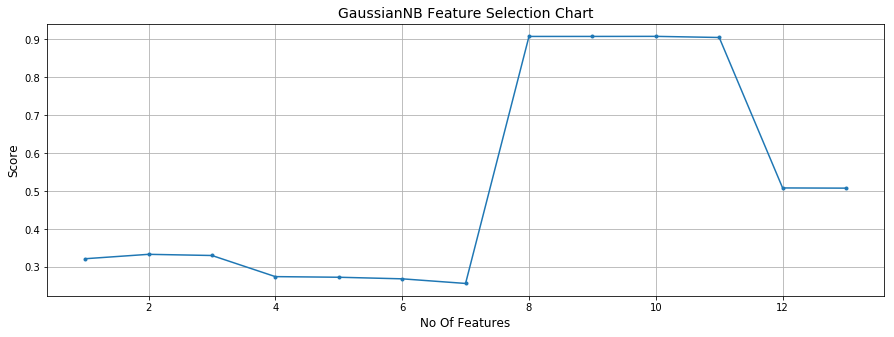

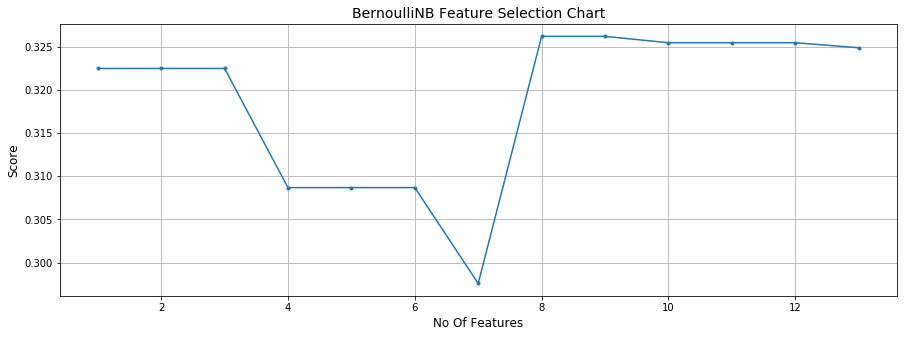

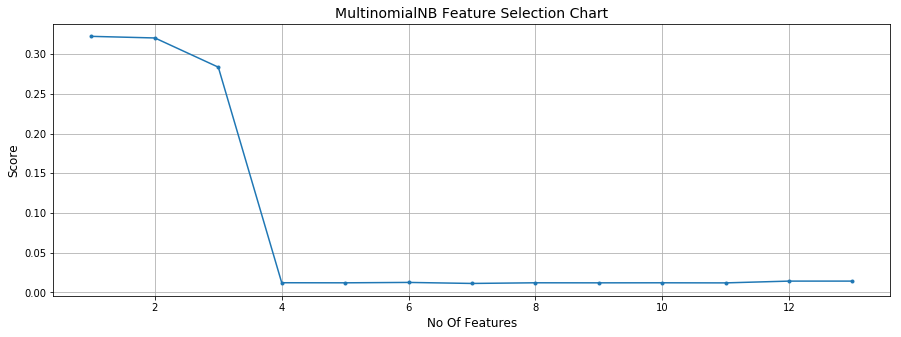

In [34]:
for md in ['GaussianNB','BernoulliNB','MultinomialNB']:
    scoresCV = []
    scores = []
    for i in range(1,len(param_df)):
        new_df=ds_enc[param_df.index[0:i+1].values]
        X = new_df.ix[:,1::]
        y = new_df.ix[:,0]
        if md=='BernoulliNB':
            clf=BernoulliNB()
        if md=='MultinomialNB':
            clf= MultinomialNB()
        if md=='GaussianNB':
            clf=GaussianNB()
        scoreCV = cross_val_score(clf, X, y, cv= 10)
        scores.append(np.mean(scoreCV))

    plt.figure(figsize=(15,5))
    plt.plot(range(1,len(scores)+1),scores, '.-')
    plt.axis("tight")
    plt.title(md+' Feature Selection Chart', fontsize=14)
    plt.xlabel('No Of Features', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.grid();
    best_features=param_df.index[0:10].values
    print(md, ' Best features:\t',best_features)

### Top 10 Features

In [35]:
best_features=param_df.index[0:10].values
print('Best features:\t',best_features)

Best features:	 ['education.num' 'relationship' 'age' 'hours.per.week' 'capital.gain'
 'sex' 'marital.status' 'capital.loss' 'education' 'race']


## 4. Split the data into training set and testing set.
#### Split DataSet into training and testing - Split into features, training data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def prepare_datafunc(dataSet, train_size=0.67):
    dataSet_features = dataSet.drop(['income'], axis=1)
    dataSet_response = dataSet['income']
    X_train, X_test, y_train, y_test = train_test_split(dataSet_features,dataSet_response,train_size=0.80,random_state=6,stratify=dataSet_response)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = prepare_datafunc(ds_enc)
print('X Train Shape:',X_train.shape)
print('X Test Shape:',X_test.shape)
print('y Train Shape:',y_train.shape)
print('y Test Shape:',y_test.shape)

X Train Shape: (26048, 14)
X Test Shape: (6513, 14)
y Train Shape: (26048,)
y Test Shape: (6513,)


In [37]:
pd.DataFrame(X_train).head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
25458,39,3,99452,9,13,2,9,0,4,1,0,0,50,38
26686,27,3,190525,8,11,4,6,4,4,1,0,0,45,38
7663,44,6,296326,9,13,4,0,1,4,1,0,0,40,38
9395,56,5,258752,9,13,2,3,0,4,1,0,0,60,38
9333,37,3,323155,3,2,2,4,0,4,1,0,0,85,25


## 5. Model the classifier using GaussianNB, BernoulliNB and MultinomialNB

In [38]:
def get_score(model,X_test,y_test):
    return model.score(X_test,y_test)   

## 5.1 MultinomialNB

In [39]:
model = MultinomialNB()
model.fit(X_train, y_train)
naive_pre= model.predict(X_test)
MultinomialNBCnfMat=confusion_matrix(y_test,naive_pre)
print(classification_report(y_test,naive_pre))
MNB = accuracy_score(y_test, naive_pre)
print("The Accuracy for MultinomialNB is {}".format(MNB))
MultinomialNBScore = get_score(model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4945
           1       0.64      0.24      0.35      1568

    accuracy                           0.78      6513
   macro avg       0.72      0.60      0.61      6513
weighted avg       0.76      0.78      0.74      6513

The Accuracy for MultinomialNB is 0.7844311377245509


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5.2 GaussianNB

In [41]:
model = GaussianNB()
model.fit(X_train, y_train)
naive_pre= model.predict(X_test)
GaussianNBCnfMat=confusion_matrix(y_test,naive_pre)
print(classification_report(y_test,naive_pre))
GNB = accuracy_score(y_test, naive_pre)
print("The Accuracy for GaussianNB is {}".format(GNB))
GaussianNBScore = get_score(model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4945
           1       0.68      0.34      0.46      1568

    accuracy                           0.80      6513
   macro avg       0.75      0.65      0.67      6513
weighted avg       0.79      0.80      0.78      6513

The Accuracy for GaussianNB is 0.8036235221863964


## 5.3 BernoulliNB

In [42]:
model = BernoulliNB()
model.fit(X_train, y_train)
naive_pre= model.predict(X_test)
BernoulliNBCnfMat=confusion_matrix(y_test,naive_pre)
print(classification_report(y_test,naive_pre))
BNB = accuracy_score(y_test, naive_pre)
print("The Accuracy for BernoulliNB is {}".format(BNB))
BernoulliNBScore = get_score(model,X_test,y_test)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4945
           1       0.58      0.59      0.59      1568

    accuracy                           0.80      6513
   macro avg       0.72      0.73      0.73      6513
weighted avg       0.80      0.80      0.80      6513

The Accuracy for BernoulliNB is 0.7985567326884692


## 6. Compute the accuracy and confusion matrix for each models.
### Comparing the Performance of each algorithm

Best algorithm is BernoulliNB, with BernoulliNBScore : 0.8036235221863964


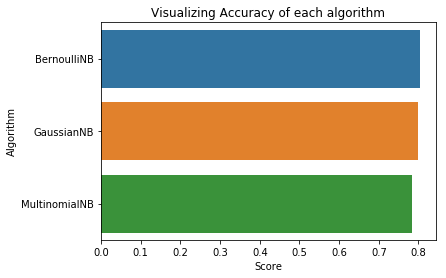

In [43]:
import seaborn as sns
names = ['BernoulliNB', 'GaussianNB', 'MultinomialNB']
Algorithm = [GNB,BNB,MNB]
best = max(Algorithm)
for i in range(3):
    if best == Algorithm[i]:
        print(f'Best algorithm is {names[i]}, with BernoulliNBScore : {Algorithm[i]}')
        sns.barplot(x=Algorithm, y=names)
plt.xlabel('Score')
plt.ylabel('Algorithm')
plt.title("Visualizing Accuracy of each algorithm")
plt.show()

Text(0.5, 1.0, 'BernoulliNB Confusion Matrix')

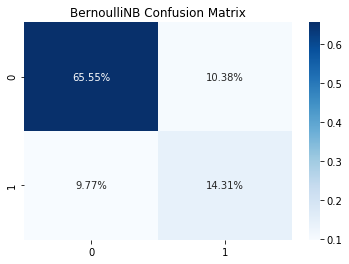

In [44]:
ax = plt.axes()
sns.heatmap(BernoulliNBCnfMat/np.sum(BernoulliNBCnfMat), annot=True, fmt='.2%', cmap='Blues', ax = ax)
ax.set_title('BernoulliNB Confusion Matrix')

Text(0.5, 1.0, 'MultinomialNB Confusion Matrix')

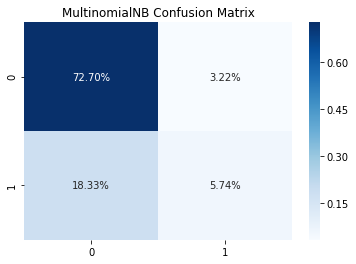

In [45]:
ax = plt.axes()
sns.heatmap(MultinomialNBCnfMat/np.sum(MultinomialNBCnfMat), annot=True, fmt='.2%', cmap='Blues', ax = ax)
ax.set_title('MultinomialNB Confusion Matrix')


Text(0.5, 1.0, 'GaussianNB Confusion Matrix')

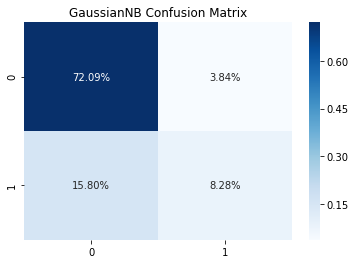

In [46]:
ax = plt.axes()
sns.heatmap(GaussianNBCnfMat/np.sum(GaussianNBCnfMat), annot=True, fmt='.2%', cmap='Blues', ax = ax)
ax.set_title('GaussianNB Confusion Matrix')

Best algorithm is GaussianNB, with score : 0.8036235221863964


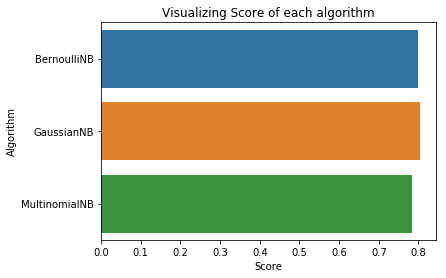

In [47]:
import seaborn as sns
names = ['BernoulliNB', 'GaussianNB', 'MultinomialNB']
Algorithm = [BernoulliNBScore,GaussianNBScore,MultinomialNBScore]
best = max(Algorithm)
for i in range(3):
    if best == Algorithm[i]:
        print(f'Best algorithm is {names[i]}, with score : {Algorithm[i]}')
        sns.barplot(x=Algorithm, y=names)
plt.xlabel('Score')
plt.ylabel('Algorithm')
plt.title("Visualizing Score of each algorithm")
plt.show()

## 7. Plot the decision boundary, visualize training and test results of all the models

In [48]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    reduced_data = X.iloc[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)
    h = .02
    x_min, x_max = reduced_data.iloc[:, 0].min() - 1, reduced_data.iloc[:, 0].max() + 1
    y_min, y_max = reduced_data.iloc[:, 1].min() - 1, reduced_data.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.8)
    return plt

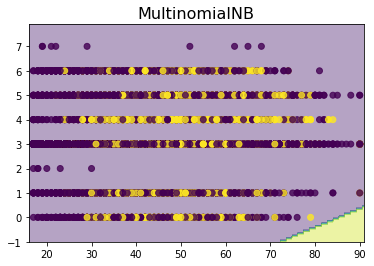

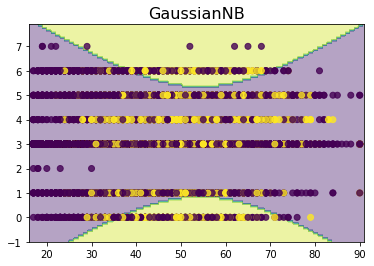

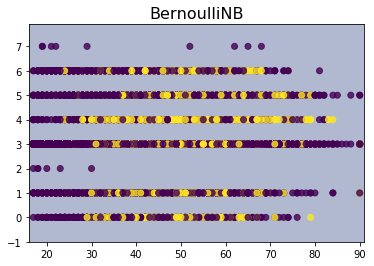

In [49]:
dataSet_features = ds_enc.drop(['income'], axis=1)
dataSet_response = ds_enc['income']
X_train, X_test, y_train, y_test = train_test_split(dataSet_features,dataSet_response,train_size=0.80,random_state=6,stratify=dataSet_response)
plt.figure()
plt.title('MultinomialNB',fontsize=16)
plot_decision_boundaries(X_train, y_train,MultinomialNB)
plt.show()

plt.figure()
plt.title('GaussianNB',fontsize=16)
plot_decision_boundaries(X_train, y_train,GaussianNB)
plt.show()

plt.figure()
plt.title('BernoulliNB',fontsize=16)
plot_decision_boundaries(X_train, y_train,BernoulliNB)
plt.show()

### 7.1 Decision Boundary using mlxtend

To Draw Decision Boundary below are the points considered, region of a problem space in which the output label of a classifier is ambiguous.
- To draw decision boundary we have to consider 2 features & 1 output class


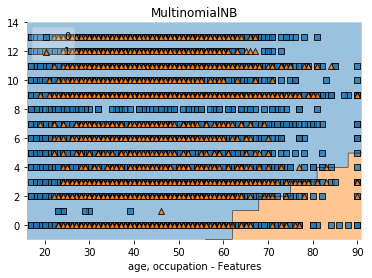

In [50]:
X_train_sample=X_train[['age','occupation']].values
y_train_sample=y_train
logModel=MultinomialNB()
logModel.fit(X_train_sample,np.array(y_train_sample))
plot_decision_regions(X_train_sample,np.array(y_train_sample), clf=logModel, legend=2)
plt.xlabel('age, occupation - Features')
plt.title('MultinomialNB')
plt.show()

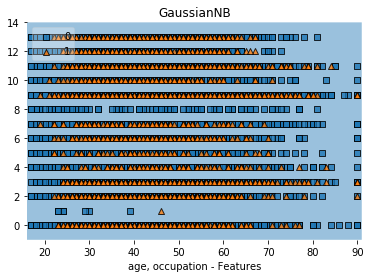

In [51]:
X_train_sample=X_train[['age','occupation']].values
y_train_sample=y_train
logModel=GaussianNB()
logModel.fit(X_train_sample,np.array(y_train_sample))
plot_decision_regions(X_train_sample,np.array(y_train_sample), clf=logModel, legend=2)
plt.xlabel('age, occupation - Features')
plt.title('GaussianNB')
plt.show()

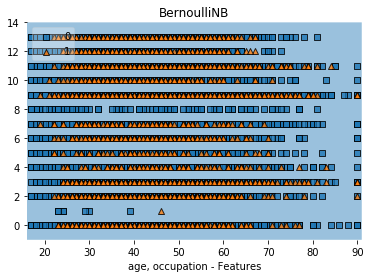

In [52]:
X_train_sample=X_train[['age','occupation']].values
y_train_sample=y_train
logModel=BernoulliNB()
logModel.fit(X_train_sample,np.array(y_train_sample))
plot_decision_regions(X_train_sample,np.array(y_train_sample), clf=logModel, legend=2)
plt.xlabel('age, occupation - Features')
plt.title('BernoulliNB')
plt.show()

## 8. Create an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted).

In [53]:
out_ds=(X_test.join(y_test)).copy()
out_ds.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
30767,43,3,87284,15,10,4,5,1,4,1,0,0,40,38,0
11068,37,1,174924,15,10,0,10,4,4,1,0,0,48,10,0
20582,21,3,383603,0,6,4,7,1,4,0,0,0,35,38,0
23127,42,3,197522,15,10,5,6,4,2,0,0,0,40,38,0
28292,61,3,79827,11,9,2,3,0,4,1,0,0,50,38,0


In [54]:
out_ds.to_csv(os.path.join(cwd,'output.csv'),index=False)